<a href="https://colab.research.google.com/github/ArcticFoox/problem_solving_programming/blob/main/problem_solving_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('drive/MyDrive/train_data.csv')
test = pd.read_csv('drive/MyDrive/test_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
train.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,497115,1,1,5,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.7,0.5,-1.000000,8,1,-1,8,1,11,1,1,0,1,71,2,0.529150,1.534486,0.494975,3.605551,0.3,0.1,0.3,3,2,9,4,10,1,5,5,1,1,7,1,1,0,0,0,0,0
1,175191,6,2,4,0,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.9,0.5,1.084262,11,1,1,0,1,11,1,1,2,1,104,3,0.447214,0.866979,0.358190,3.316625,0.8,0.8,0.8,3,0,7,4,6,3,4,4,5,2,8,0,1,0,1,0,0,0
2,1270978,2,1,5,1,0,0,0,0,1,0,0,0,0,0,12,1,0,0,0.3,0.2,-1.000000,4,0,-1,0,1,15,1,1,0,1,5,2,0.424264,0.992378,0.400000,3.162278,0.9,0.2,0.0,3,2,9,2,9,0,10,9,2,4,10,0,1,0,0,1,0,0
3,365430,3,2,2,0,0,0,0,0,1,0,0,0,0,0,11,1,0,0,0.9,0.3,0.714580,7,1,-1,0,-1,11,0,1,2,1,7,3,0.424264,0.736644,0.412916,2.828427,0.4,0.0,0.9,3,2,8,1,7,2,10,5,2,0,3,1,1,1,0,0,1,0
4,120982,2,2,1,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.2,0.3,-1.000000,8,1,-1,0,1,1,1,1,0,1,65,1,0.316228,0.620084,0.350714,3.162278,0.6,0.5,0.3,0,1,7,2,8,2,8,5,1,3,9,0,0,0,0,0,1,0


In [ ]:
train.shape

(476169, 59)

In [ ]:
train.drop_duplicates()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,497115,1,1,5,1,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0.7,0.5,-1.000000,8,1,-1,8,1,11,1,1,0,1,71,2,0.529150,1.534486,0.494975,3.605551,0.3,0.1,0.3,3,2,9,4,10,1,5,5,1,1,7,1,1,0,0,0,0,0
1,175191,6,2,4,0,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.9,0.5,1.084262,11,1,1,0,1,11,1,1,2,1,104,3,0.447214,0.866979,0.358190,3.316625,0.8,0.8,0.8,3,0,7,4,6,3,4,4,5,2,8,0,1,0,1,0,0,0
2,1270978,2,1,5,1,0,0,0,0,1,0,0,0,0,0,12,1,0,0,0.3,0.2,-1.000000,4,0,-1,0,1,15,1,1,0,1,5,2,0.424264,0.992378,0.400000,3.162278,0.9,0.2,0.0,3,2,9,2,9,0,10,9,2,4,10,0,1,0,0,1,0,0
3,365430,3,2,2,0,0,0,0,0,1,0,0,0,0,0,11,1,0,0,0.9,0.3,0.714580,7,1,-1,0,-1,11,0,1,2,1,7,3,0.424264,0.736644,0.412916,2.828427,0.4,0.0,0.9,3,2,8,1,7,2,10,5,2,0,3,1,1,1,0,0,1,0
4,120982,2,2,1,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.2,0.3,-1.000000,8,1,-1,0,1,1,1,1,0,1,65,1,0.316228,0.620084,0.350714,3.162278,0.6,0.5,0.3,0,1,7,2,8,2,8,5,1,3,9,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476164,547575,5,1,9,0,0,0,0,0,1,0,0,0,0,0,10,1,0,0,0.9,0.8,1.009950,7,1,-1,0,-1,1,1,1,2,1,64,1,0.315278,0.426159,0.361248,0.000000,0.8,0.1,0.8,3,1,7,2,10,2,5,6,0,3,6,0,0,1,0,0,0,0
476165,1323101,5,1,7,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0.4,0.3,-1.000000,11,0,-1,0,-1,11,1,1,2,1,69,3,0.424264,1.208570,-1.000000,3.605551,0.2,0.8,0.0,2,1,10,4,8,3,8,5,0,5,7,0,0,1,1,1,0,0
476166,1437862,0,1,8,0,0,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.2,0.551135,7,0,-1,0,-1,11,1,0,1,1,17,2,0.424264,1.039012,-1.000000,3.741657,0.3,0.7,0.8,1,2,10,3,10,2,6,7,6,6,8,0,1,1,0,0,0,0
476167,581651,4,1,3,0,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.3,0.0,-1.000000,9,0,1,1,1,9,-1,1,2,1,104,2,0.547723,1.517031,-1.000000,3.605551,0.9,0.7,0.8,2,2,9,5,7,1,8,1,1,2,3,1,1,0,0,0,0,0


In [ ]:
test.drop_duplicates()
test.shape

(119043, 59)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476169 entries, 0 to 476168
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              476169 non-null  int64  
 1   ps_ind_01       476169 non-null  int64  
 2   ps_ind_02_cat   476169 non-null  int64  
 3   ps_ind_03       476169 non-null  int64  
 4   ps_ind_04_cat   476169 non-null  int64  
 5   ps_ind_05_cat   476169 non-null  int64  
 6   ps_ind_06_bin   476169 non-null  int64  
 7   ps_ind_07_bin   476169 non-null  int64  
 8   ps_ind_08_bin   476169 non-null  int64  
 9   ps_ind_09_bin   476169 non-null  int64  
 10  ps_ind_10_bin   476169 non-null  int64  
 11  ps_ind_11_bin   476169 non-null  int64  
 12  ps_ind_12_bin   476169 non-null  int64  
 13  ps_ind_13_bin   476169 non-null  int64  
 14  ps_ind_14       476169 non-null  int64  
 15  ps_ind_15       476169 non-null  int64  
 16  ps_ind_16_bin   476169 non-null  int64  
 17  ps_ind_17_

In [ ]:
train_copy = train.copy().replace(-1,np.NaN)

In [ ]:
import missingno as msno

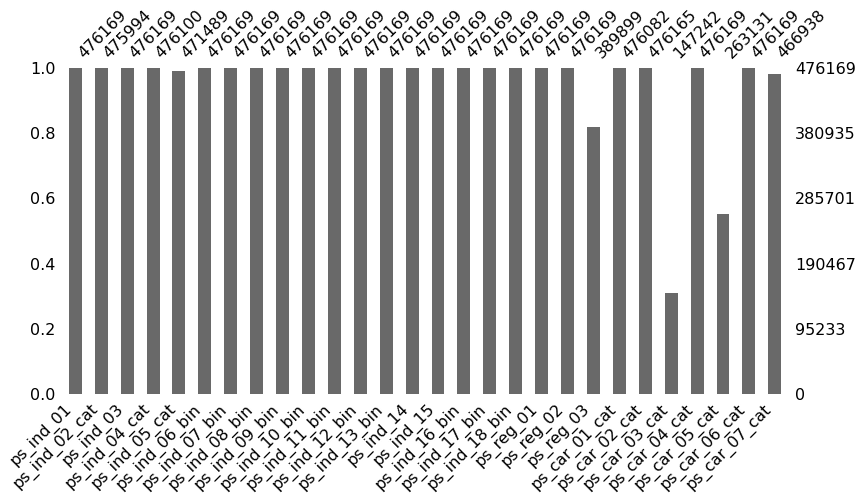

In [ ]:
msno.bar(df=train_copy.iloc[:,1:29], figsize=(13,6))

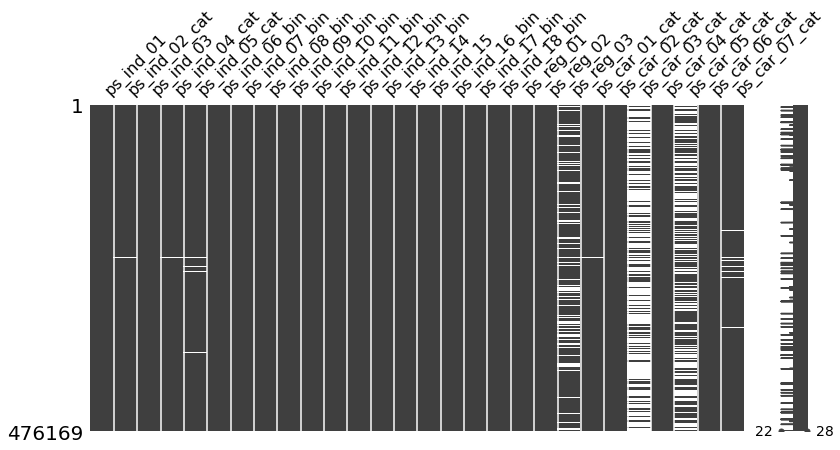

In [ ]:
msno.matrix(df=train_copy.iloc[:,1:29], figsize=(13,6))

In [ ]:
def resumetable(df):
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary['결측값 개수'] = (df == -1).sum().values
  summary['고유값 개수'] = df.nunique().values
  for col in df.columns:
    if 'bin' in col or col == 'target':
      summary.loc[col, '데이터 종류'] = '이진형'
    elif 'cat' in col:
      summary.loc[col, '데이터 종류'] = '명목형'
    elif df[col].dtype == float:
      summary.loc[col, '데이터 종류'] = '연속형'
    elif df[col].dtype == int:
      summary.loc[col, '데이터 종류'] = '순서형'
  return summary

In [ ]:
summary = resumetable(train)

In [ ]:
summary

,데이터 타입,결측값 개수,고유값 개수,데이터 종류
id,int64,0,476169,순서형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,175,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,69,3,명목형
ps_ind_05_cat,int64,4680,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


Text(0.5, 1.0, 'Target Distribution')

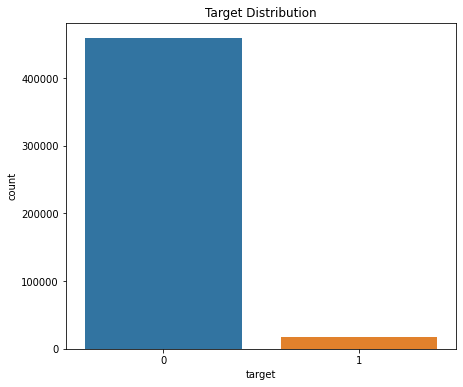

In [ ]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution')

In [ ]:
import matplotlib as mpl

Text(0.5, 1.0, 'Target Distribution')

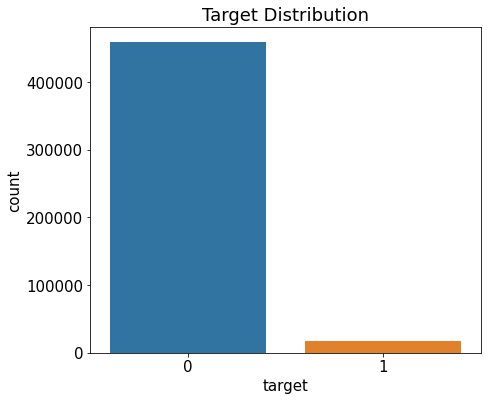

In [ ]:
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))
ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution')

In [ ]:
def write_percent(ax, total_size):
  for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    left_coord = patch.get_x()
    percent = height/total_size*100

    ax.text(left_coord + width/2.0,
            height + total_size*0.001,
            '{0:0.1f}%'.format(percent),
            ha='center')

Text(0.5, 1.0, 'Target Distribution')

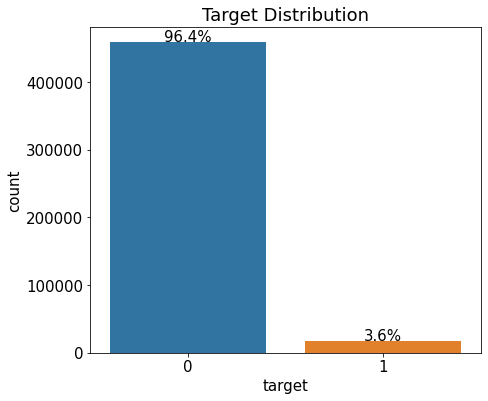

In [ ]:
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))
ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
def plot_target_ratio_by_features(df, features, num_rows, num_cols, size):
  mpl.rc('font', size=9)
  plt.figure(figsize=size)
  grid= gridspec.GridSpec(num_rows, num_cols)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  for idx, feature in enumerate(features): #feature에 넣으면서 순서를 넘버링할 때 enumerate를 사용
    ax = plt.subplot(grid[idx])
    sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

In [ ]:
bin_features = summary[summary['데이터 종류']=='이진형'].index

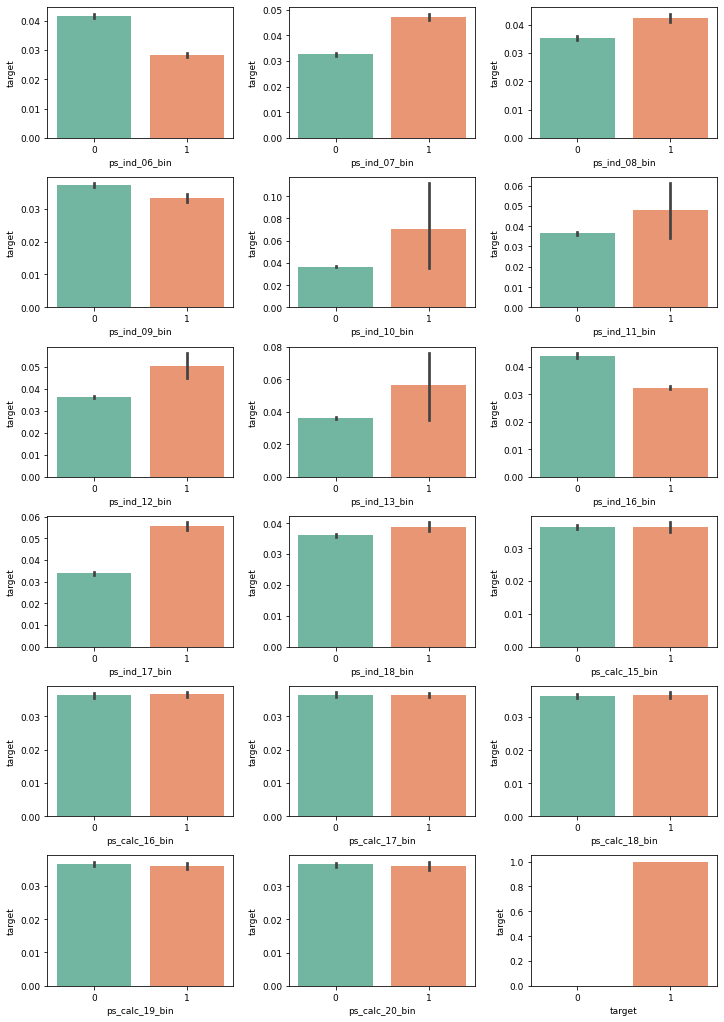

In [ ]:
plot_target_ratio_by_features(train, bin_features, 6, 3, (12, 18))

In [ ]:
nom_features = summary[summary['데이터 종류']=='명목형'].index

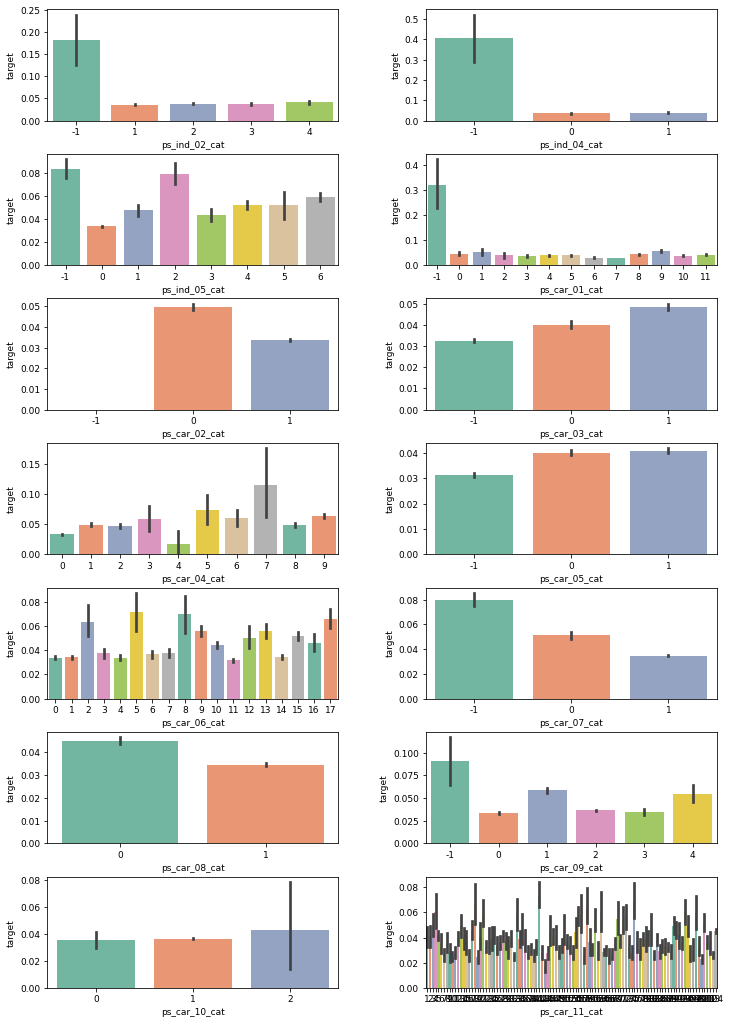

In [ ]:
plot_target_ratio_by_features(train, nom_features, 7, 2, (12, 18))

In [ ]:
ord_features = summary[summary['데이터 종류']=='순서형'].index

In [ ]:
plot_target_ratio_by_features(train, ord_features, 8, 2, (12, 20))

In [ ]:
pd.cut([1.0, 1.5, 2.1, 2.7, 3.5, 4.0],3)

In [ ]:
cont_features = summary[summary['데이터 종류']=='연속형'].index

In [ ]:
plt.figure(figsize=(12,16))
grid = girdspec.GridSpec(5, 2)

for idx, cont_feature in enumerate(cont_features):
  train[cont_feature] = pd.cut(train[cont_feature], 5)

  ax = plt.subplot(grid[idx])
  sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
  ax.tick_params(axis='x', labelrotation=10)

In [ ]:
train_copy = train_copy.dropna()

In [ ]:
plt.figure(figsize=(15,12))
cont_corr = train_copy[cont_features].corr()
sns.heatmap(cont_corr, annot=True, cmap='OrRd')

NameError: ignored

<Figure size 1080x864 with 0 Axes>

In [ ]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

In [ ]:
all_feature = all_data.columns
all_feature

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
fruits = ['사과', '블루베리', '바나나', '귤', '블루베리', '바나나', '바나나', '사과']

In [ ]:
label_encoder = LabelEncoder()
fruits_label = label_encoder.fit_transform(fruits)

In [ ]:
fruits_label

array([3, 2, 1, 0, 2, 1, 1, 3])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehot_encoder = OneHotEncoder()
fruits_onehot = onehot_encoder.fit_transform(fruits_label.reshape(-1,1))

In [ ]:
fruits_onehot

<8x4 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
fruits_onehot.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
pd.get_dummies(fruits)

,귤,바나나,블루베리,사과
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0
6,0,1,0,0
7,0,0,0,1


In [ ]:
cat_feature = [feature for feature in all_feature if 'cat' in feature]

In [ ]:
cat_feature

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [ ]:
encoded_cat = onehot_encoder.fit_transform(all_data[cat_feature])

In [ ]:
encoded_cat

<595212x184 sparse matrix of type '<class 'numpy.float64'>'
	with 8332968 stored elements in Compressed Sparse Row format>

In [ ]:
encoded_cat.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin'
                'ps_ind_13_bin', 'ps_car_14', 'id']

In [ ]:
remaining_features = [feature for feature in all_feature
                      if('calc' not in feature and 'cat' not in feature and
                         feature not in drop_features)]

In [ ]:
from scipy import sparse

In [ ]:
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]), encoded_cat], format='csr')

In [ ]:
df = pd.DataFrame({'키':[1.7,1.5,1.8], '몸무게':[75,55,60]})

In [ ]:
df

,키,몸무게
0,1.7,75
1,1.5,55
2,1.8,60


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_M = MinMaxScaler()

In [ ]:
df_scaled = scaler_M.fit_transform(df)

In [ ]:
df_scaled

array([[0.66666667, 1.        ],
       [0.        , 0.        ],
       [1.        , 0.25      ]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler_S = StandardScaler()

In [ ]:
df_scaled_S = scaler_S.fit_transform(df)

In [ ]:
df_scaled_S

array([[ 0.26726124,  1.37281295],
       [-1.33630621, -0.98058068],
       [ 1.06904497, -0.39223227]])

In [ ]:
num_train = len(train)

In [ ]:
X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

In [ ]:
y_train = train['target'].values
y_test = test['target'].values

In [ ]:
# 54 page Precision은 예측평균 Recall은 실제 평균 알아둘것

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : list(range(10,30,10)), 'random_state' : [42]}

grid = GridSearchCV(LGBMClassifier(), param_grid, n_jobs=-1, cv=5, verbose=2)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'random_state': [42]},
             verbose=2)

In [ ]:
grid.best_params_

{'max_depth': 10, 'random_state': 42}

In [ ]:
LGBM_model = LGBMClassifier(max_depth = grid.best_params_['max_depth'],
                            random_state = grid.best_params_['random_state'])

LGBM_model.fit(X_train, y_train)

LGBMClassifier(max_depth=10, random_state=42)

In [ ]:
pred_train = LGBM_model.predict(X_train)
pred_test = LGBM_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_train, pred_train)

array([[458813,      1],
       [ 17340,     15]])

In [ ]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    458814
           1       0.94      0.00      0.00     17355

    accuracy                           0.96    476169
   macro avg       0.95      0.50      0.49    476169
weighted avg       0.96      0.96      0.95    476169



In [ ]:
LGBM_model.predict_proba(X_train)[:,1]

array([0.05856811, 0.04738483, 0.0265119 , ..., 0.04822524, 0.04879173,
       0.02133262])

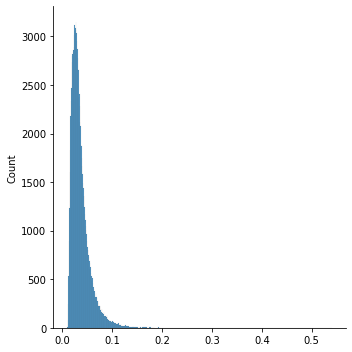

In [ ]:
sns.displot(LGBM_model.predict_proba(X_test)[:,1])

In [ ]:
proba = LGBM_model.predict_proba(X_train)[:,1]

In [ ]:
len(proba[proba>0.5])

16

In [ ]:
from sklearn.metrics import roc_curve, auc

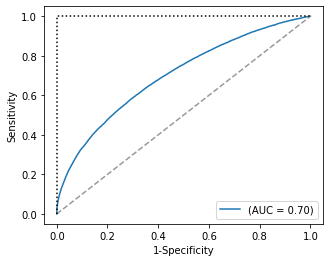

In [ ]:
fig = plt.figure(figsize=(5, 4))
fpr, tpr, thresholds = roc_curve(y_train, LGBM_model.predict_proba(X_train)[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='(AUC = {0:0.2f})'.format(roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6))
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.legend(loc="lower right")
plt.show()

In [ ]:
LGBM_model = LGBMClassifier(max_depth = grid.best_params_['max_depth'],
                            random_state = grid.best_params_['random_state'],
                            scale_pos_weight=20)

LGBM_model.fit(X_train, y_train)

LGBMClassifier(max_depth=10, random_state=42, scale_pos_weight=20)

In [ ]:
pred_train = LGBM_model.predict(X_train)
pred_test = LGBM_model.predict(X_test)

In [ ]:
confusion_matrix(y_train, pred_train)

array([[375247,  83567],
       [  9896,   7459]])

In [ ]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89    458814
           1       0.08      0.43      0.14     17355

    accuracy                           0.80    476169
   macro avg       0.53      0.62      0.51    476169
weighted avg       0.94      0.80      0.86    476169

